## Notebook Purpose

Evaluate output of original fastmri (pytorch=1.5) vs new fastmri (pytorch=1.7) to see if output is the same

In [18]:
import os, sys
from os import listdir
from os.path import isfile, join
import numpy as np
import torch
from matplotlib import pyplot as plt

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.evaluate import calc_metrics, normalize_img

In [16]:
def plot_list(arr_list):
    
    NUM_COLS = len(arr_list)
    title_list = ['ground-truth', 'old', 'new']
    
    fig = plt.figure(figsize=(20,20))
    
    for idx in range(NUM_COLS):
        ax = fig.add_subplot(1,NUM_COLS,idx+1)
        ax.imshow(arr_list[idx], cmap='gray')
        ax.set_title(title_list[idx], fontsize=20)
        ax.axis('off')
    plt.show()

In [8]:
path_o = '/bmrNAS/people/dvv/out_fastmri/old_pytorch1.5/'
path_n = '/bmrNAS/people/dvv/out_fastmri/new_pytorch1.7/'

def get_files(path):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    files.sort()
    return files

files_o = [f for f in get_files(path_o) if 'iter10000_alpha0.npy' in f]
files_n_dc = [f for f in get_files(path_n) if '_dc.npy' in f]

In [21]:
files_n_dc

['1000007_dc.npy',
 '1000273_dc.npy',
 '1000325_dc.npy',
 '1000464_dc.npy',
 '1000537_dc.npy',
 '1000818_dc.npy',
 '1001140_dc.npy']

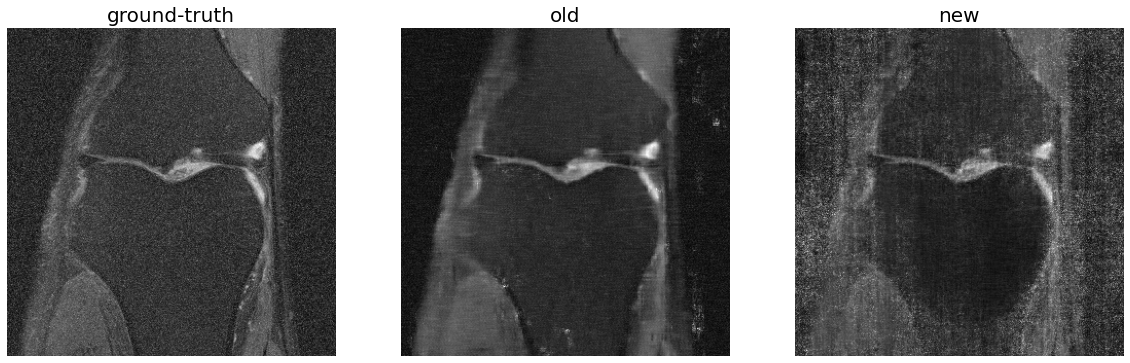

1000007
0.4051197903764979 23.931084394094903
0.2368202453643575 19.49049538730697


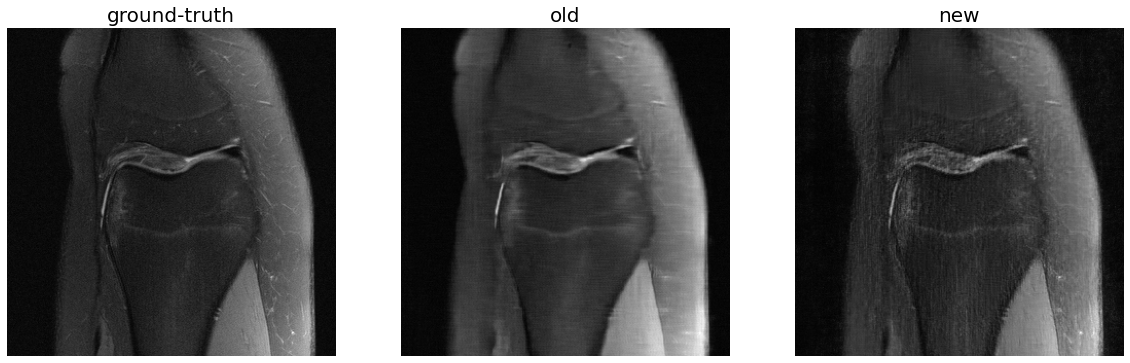

1000273
0.7516028750393554 30.837173817869953
0.7136523122337903 30.981488414304614


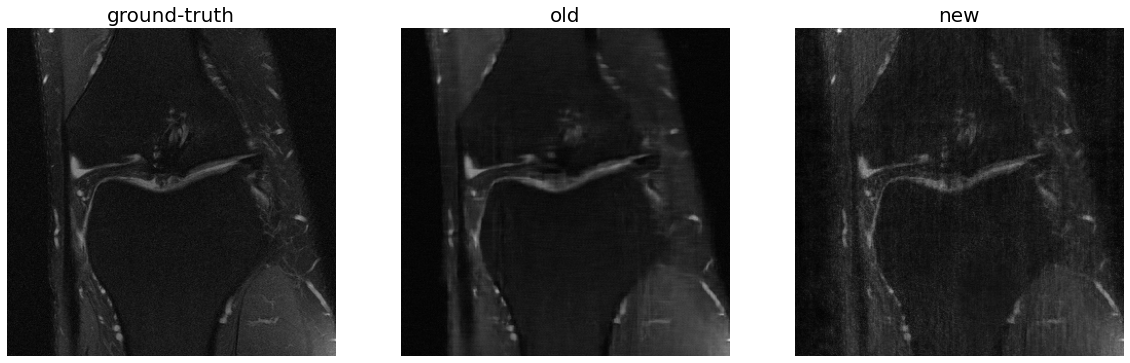

1000325
0.7638936716377663 32.14250656441503
0.639881363815645 29.917818291572633


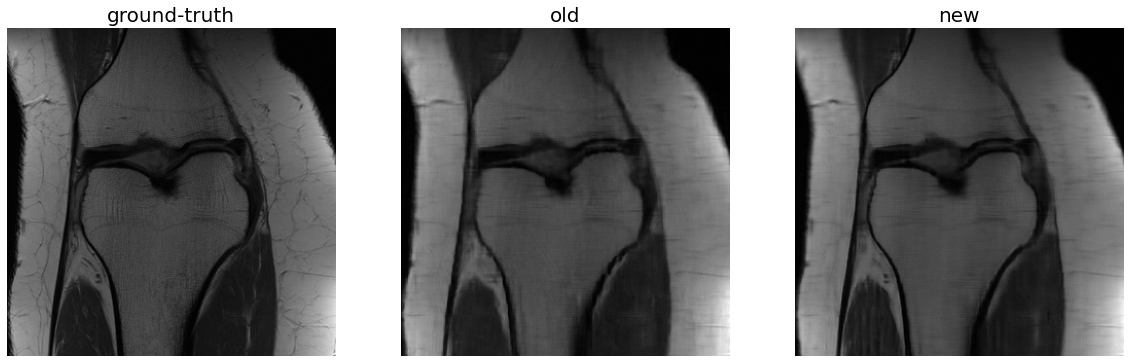

1000464
0.8420059627873218 32.622497959138464
0.8690454887674164 34.42132484801508


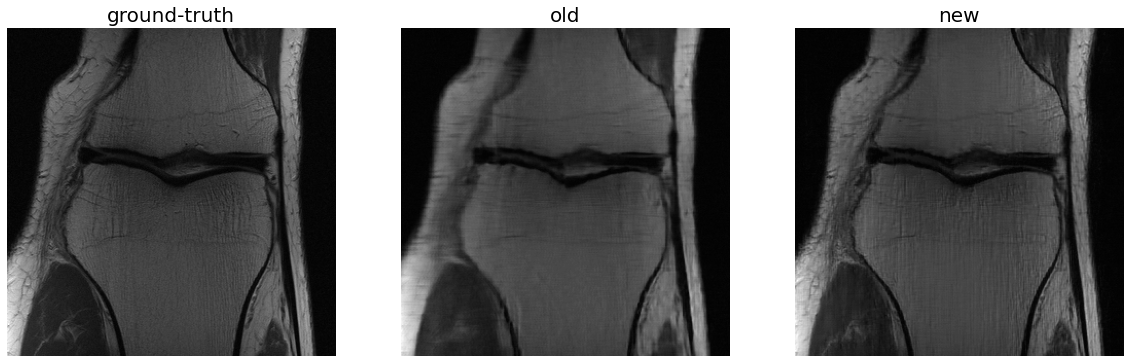

1000537
0.7971089866563758 30.98193031951398
0.8377147852846137 33.27884640552752


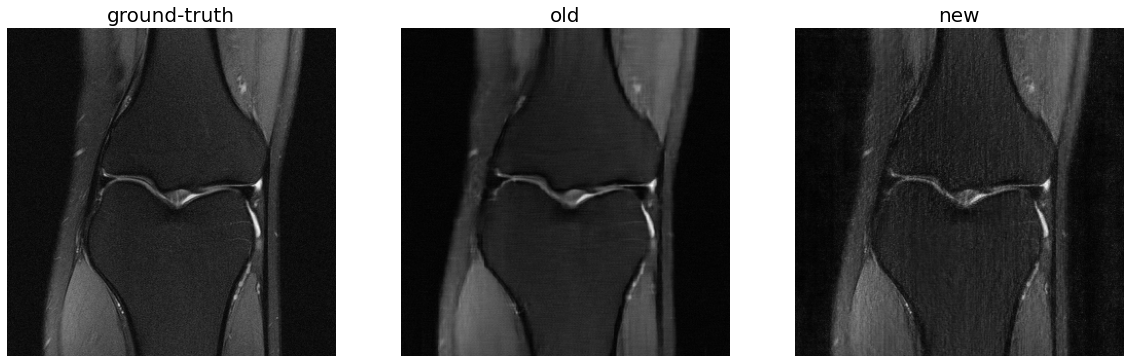

1000818
0.7875588138672605 32.069665566430054
0.6712708987627636 30.26053605112404


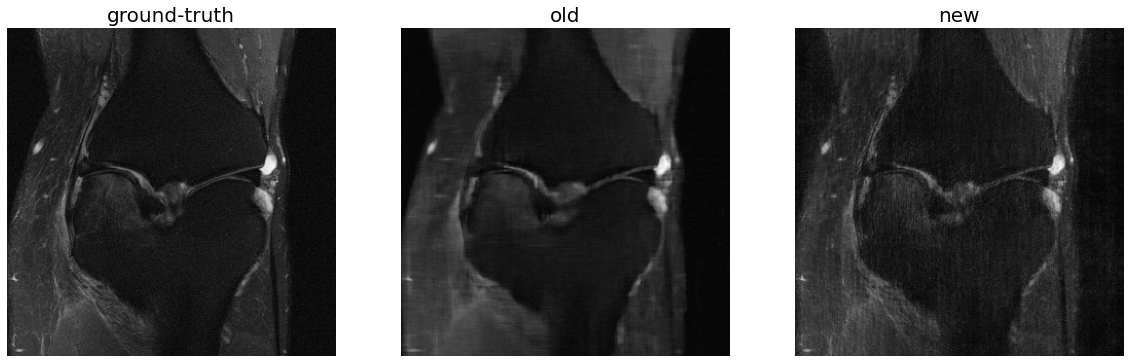

1001140
0.7531692688475217 30.993035399970342
0.6491251967395611 29.718636134233726


In [20]:
for f in files_n_dc:
    
    vid_key = f.split('_')[0]
    
    arr_n = np.load(path_n + f)
    arr_o = np.load('{}{}_iter10000_alpha0.npy'.format(path_o, vid_key))
    arr_gt = np.load('{}{}_gt.npy'.format(path_n, vid_key))
    
    plot_list([arr_gt, arr_o, arr_n])
    
    _, _, ssim_n, psnr_n = calc_metrics(arr_n, arr_gt)
    _, _, ssim_o, psnr_o = calc_metrics(arr_o, arr_gt)
    print(vid_key)
    print(ssim_o, psnr_o)
    print(ssim_n, psnr_n)